# Logistic Regression


**Logistic Regression**

Is a classification alforithm for categorical 

*Logistic Function*
$\hat{y} = \sigma(\theta^TX) = \frac{1}{1 + e^{-\theta^TX}}$ 

the output of the model
* $P(y = 1 | x)$
* $P(y = 0 | x) = 1 - P(y = 1 | x)$

**aplications**
* Predicting the probability of a person having a heart attack
* Predicting the mortality in injured patients
* Predicting a customer's propensity to purchase a product or halt a subscription
* Predicting the probability of faillure of a given process or product
* Predicting the likelihood of a homeowner defaulting on a mortgage

**Suitable**
* If your target of the data is binary $y = {0, 1}$
* Iy you need probabilistic results
* When you need a linear decision boundary $\theta_0+\theta_1x_1+\theta_2x_2>0$

**The training process**
1. Initialize $\theta$
2. Calculate $\hat{y} = \sigma(\theta^TX)$
3. compare the output of $\hat{y}$ with actual output of customer $y$, and record it as error
4. Change the $\theta$ to reduce the cost
5. Go back to step 2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import preprocessing


**About the dataset**

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.
This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*Demographic info about customers – gender, age range, and if they have partners and dependents

In [2]:
!wget -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

--2021-11-14 15:34:15--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.10K  --.-KB/s    in 0.04s   

2021-11-14 15:34:16 (1000 KB/s) - ‘ChurnData.csv’ saved [35943/35943]



In [3]:
df = pd.read_csv("ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [7]:
df.shape

(200, 28)

In [12]:
df.dtypes

tenure      float64
age         float64
address     float64
income      float64
ed          float64
employ      float64
equip       float64
callcard    float64
wireless    float64
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
cardten     float64
voice       float64
pager       float64
internet    float64
callwait    float64
confer      float64
ebill       float64
loglong     float64
logtoll     float64
lninc       float64
custcat     float64
churn       float64
dtype: object

In [8]:
df.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

*There is not missing data*

**Pre - Processing**

select some features

Independent variables (X)
* Tenure
* Age
* address
* income
* ed
* employ
* equip


predict variable (Y)
* churn

In [18]:
df.corr()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
tenure,1.000000,0.431802,0.456328,0.109383,-0.070503,0.445755,-0.117102,0.426530,-0.070590,-0.376860
age,0.431802,1.000000,0.746566,0.211275,-0.071509,0.622553,-0.071357,0.170404,-0.065527,-0.287697
address,0.456328,0.746566,1.000000,0.132807,-0.145550,0.520926,-0.148977,0.209204,-0.146478,-0.260659
income,0.109383,0.211275,0.132807,1.000000,0.141241,0.345161,-0.010741,-0.019969,-0.029635,-0.090790
ed,-0.070503,-0.071509,-0.145550,0.141241,1.000000,-0.213886,0.488041,-0.071178,0.267670,0.216112
employ,0.445755,0.622553,0.520926,0.345161,-0.213886,1.000000,-0.174470,0.266612,-0.101187,-0.337969
equip,-0.117102,-0.071357,-0.148977,-0.010741,0.488041,-0.174470,1.000000,-0.087051,0.386735,0.275284
callcard,0.426530,0.170404,0.209204,-0.019969,-0.071178,0.266612,-0.087051,1.000000,0.220118,-0.311451
wireless,-0.070590,-0.065527,-0.146478,-0.029635,0.267670,-0.101187,0.386735,0.220118,1.000000,0.174356
churn,-0.376860,-0.287697,-0.260659,-0.090790,0.216112,-0.337969,0.275284,-0.311451,0.174356,1.000000


When we use scikit learn, it's important to transform the type of the data to an integer

In [19]:
df = df[["tenure", "age", "address", "income", "ed", "employ", "equip", "churn"]].astype("int")
df.head()

,tenure,age,address,income,ed,employ,equip,churn
0,11,33,7,136,5,5,0,1
1,33,33,12,33,2,0,0,1
2,23,30,9,30,1,2,0,0
3,38,35,5,76,2,10,1,0
4,7,35,14,80,2,15,0,0


When we use scikit learn, it's important to transform the type of the data to an integer

In [20]:
X = np.asanyarray(df[["tenure", "age", "address", "income", "ed", "employ", "equip"]])
y = np.asanyarray(df["churn"])

print(X[0:5])
print(y[0:5])

[[ 11  33   7 136   5   5   0]
 [ 33  33  12  33   2   0   0]
 [ 23  30   9  30   1   2   0]
 [ 38  35   5  76   2  10   1]
 [  7  35  14  80   2  15   0]]
[1 1 0 0 0]


In [22]:
from sklearn.preprocessing import StandardScaler

In [24]:
standard = StandardScaler()

X_standard = standard.fit_transform(X)
X_standard[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.2, random_state = 4)

print("the shape of the training set: {}".format(X_train.shape[0]))
print("the shape of the test set: {}".format(X_test.shape[0]))

the shape of the training set: 160
the shape of the test set: 40


**Modeling**

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models. C parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization. Now let's fit our model with train set:

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [33]:
lr = LogisticRegression(C = 0.01, solver = "liblinear")
lr.fit(X_train, y_train)

y_hat = lr.predict(X_test)

print("The original values:  {}".format(y_test[0:5]))
print("The predicted values: {}".format(y_hat[0:5]))

The original values:  [0 0 1 0 1]
The predicted values: [0 0 0 0 0]


**predict_proba** returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, $P(Y=1|X)$:

In [41]:
y_hat_prob = lr.predict_proba(X_test)

print("The original values:  {}".format(y_test[0:5]))
print("The probability of predicted target: \nP(y = 0 | x)  P(y = 1 | x) \n{} ".format(y_hat_prob[0:5]))

The original values:  [0 0 1 0 1]
The probability of predicted target: 
P(y = 0 | x)  P(y = 1 | x) 
[[0.54132919 0.45867081]
 [0.60593357 0.39406643]
 [0.56277713 0.43722287]
 [0.63432489 0.36567511]
 [0.56431839 0.43568161]] 


**Evaluation**



**Jaccard index**

Let's try the jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [42]:
from sklearn.metrics import jaccard_score

In [44]:
idx_jaccard = jaccard_score(y_test, y_hat, pos_label = 0)
print("The jaccard index values is: {}".format(idx_jaccard))

The jaccard index values is: 0.7058823529411765


**Confusion matrix**

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_hat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


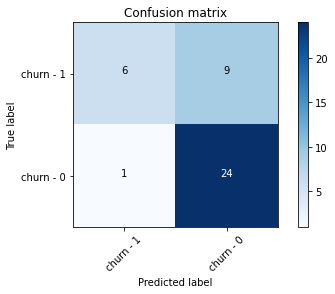

In [48]:
cnf_matrix = confusion_matrix(y_test, y_hat, labels = [1, 0])
np.set_printoptions(precision = 2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ["churn - 1", "churn - 0"], normalize = False, title = "Confusion matrix")

In [49]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



In [51]:
from sklearn.metrics import log_loss

**Log loss**

Now, let's try log loss for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [53]:
log_loss(y_test, y_hat_prob)

0.6017092478101185